# Reconocimientos de placas

#### Se importan las librerías

In [1]:
import ipywidgets as widgets
import mysql.connector
import cv2
import imutils
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image

#### Subida de archivos

In [2]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value=(), description='Upload')

#### Guardado de la imagen

In [3]:
uploader.value
uploaded_file = uploader.value[0]
with open("./saved-output.jpg", "wb") as fp:
    fp.write(uploaded_file.content)

widgets.Image(value=uploaded_file.content.tobytes())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xb0\x00\x00\x03\x84\x08\x06\x00\x00\x00\xb1m\xc8…

#### Detección de la placa

In [4]:
#TEXT DTECTION 
img = cv2.imread('./saved-output.jpg',cv2.IMREAD_COLOR)

img = cv2.resize(img, (620,480) )

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale
gray = cv2.bilateralFilter(gray, 11, 17, 17) #Blur to reduce noise
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection

# find contours in the edged image, keep only the largest
# ones, and initialize our screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

# loop over our contours
for c in cnts:
 # approximate the contour
 peri = cv2.arcLength(c, True)
 approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
 # if our approximated contour has four points, then
 # we can assume that we have found our screen
 if len(approx) == 4:
  screenCnt = approx
  break

 

if screenCnt is None:
 detected = 0
 print ("No contour detected")
else:
 detected = 1

if detected == 1:
 cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)

# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

# Now crop
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

#Read the number plate
text = pytesseract.image_to_string(Cropped, config='-l eng --oem 1 --psm 12')
print("La placa detectada es:",text)

#cv2.imshow('image',img)
#cv2.imshow('Cropped',Cropped)

#print(img)
#print(Cropped)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

La placa detectada es: LOLWATT



#### Impresión de la imagen con la placa detectada

<function matplotlib.pyplot.show(close=None, block=None)>

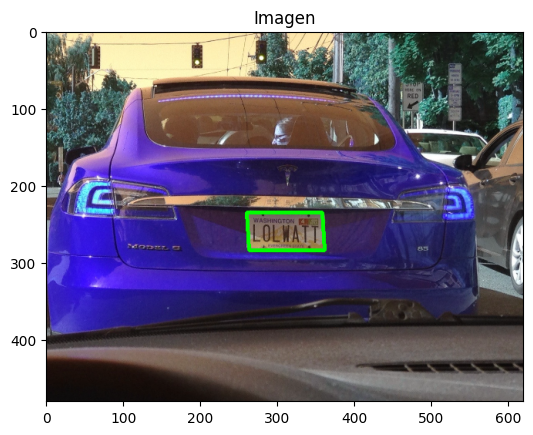

In [5]:
plt.imshow(img)
plt.title('Imagen')
plt.show

#### Recorte de la imagen con la placa detectada

<function matplotlib.pyplot.show(close=None, block=None)>

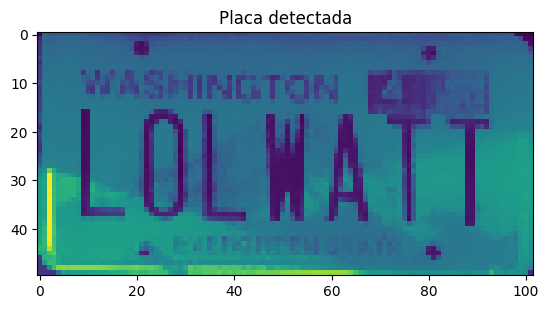

In [6]:
plt.imshow(Cropped)
plt.title('Placa detectada')
plt.show

#### Conexión con la Base de Datos

In [7]:
#Listado de todas las tablas de una base de datos de MySQL.
conexion1=mysql.connector.connect(host="localhost", 
                                  user="root", 
                                  passwd="", 
                                  database="vehiculos")

#### Comparativa si la placa del vehiculo se encuentra en la BD

In [8]:
cursor1=conexion1.cursor()
cursor1.execute("select placa from app_autos_vehiculo")

resultado = False
for fila in cursor1:
    if text.rstrip('\n') == fila[0]:
        resultado = True
conexion1.close() 

if resultado:
    print("La placa " + text.rstrip('\n') + " se encuentra registrada en el sistema")
else:
    print("La placa " + text.rstrip('\n') + " no se encuentra registrada en el sistema")
 

La placa LOLWATT se encuentra registrada en el sistema
